# PROJECT - 1

# Predicting players rating 
In this project you are going to predict the overall rating of soccer player based on their attributes
such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than
10,000 players for European professional soccer seasons from 2008 to 2016.

IMPORT LIBRARIES

In [3]:
import sqlite3
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from math import sqrt
from tqdm import tqdm_notebook
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
# Create your connection.
cnx = sqlite3.connect('database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx)

In [5]:
df.head() # Look at the sample of the data..

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,183978.0,91989.500000,53110.018250,1.0,45995.25,91989.5,137983.75,183978.0
player_fifa_api_id,183978.0,165671.524291,53851.094769,2.0,155798.00,183488.0,199848.00,234141.0
player_api_id,183978.0,135900.617324,136927.840510,2625.0,34763.00,77741.0,191080.00,750584.0
overall_rating,183142.0,68.600015,7.041139,33.0,64.00,69.0,73.00,94.0
potential,183142.0,73.460353,6.592271,39.0,69.00,74.0,78.00,97.0
crossing,183142.0,55.086883,17.242135,1.0,45.00,59.0,68.00,95.0
finishing,183142.0,49.921078,19.038705,1.0,34.00,53.0,65.00,97.0
heading_accuracy,183142.0,57.266023,16.488905,1.0,49.00,60.0,68.00,98.0
short_passing,183142.0,62.429672,14.194068,3.0,57.00,65.0,72.00,97.0
volleys,181265.0,49.468436,18.256618,1.0,35.00,52.0,64.00,93.0


In [7]:
print("Dimension of the Data \nRows: %d \nColumns: %d " %(df.shape[0], df.shape[1]))#Get Number of Rows and columns

Dimension of the Data 
Rows: 183978 
Columns: 42 


In [8]:
#Take Copy of the Data to Work On
inputData = df.copy(deep=True)

In [9]:
# Check how many columns in a row has null value and take the count of it for each row
inputData.isnull().sum(axis=1).sort_values(ascending=False)[:15] 
# From the below its clear that, there are many rows which has 38 out of 42 columns null

12019     38
50456     38
71808     38
163611    38
64235     38
86401     38
110702    38
179003    38
141160    38
41985     38
86441     38
4801      38
179079    38
50650     38
110793    38
dtype: int64

In [10]:
# Adding a new column with count of null values in a row
inputData['nancount'] =inputData.apply(lambda x: x.isnull().sum(), axis=1)


In [11]:
# Group by to get number of rows based on the null count
inputData.groupby(['nancount']).count().iloc[:,0:1]
# From the results below it is identified that there are 836 rows where 38 fields are null, which can be removed

,id
nancount,
0,180354
1,911
7,394
8,1483
38,836


In [12]:
inputData.isnull().sum(axis=0).sort_values(ascending=False)[:20]
# from below we can confirm that, there is no significant colum where more (may be 80%) of the values is null
# So this can be retained

attacking_work_rate    3230
agility                2713
volleys                2713
balance                2713
sliding_tackle         2713
jumping                2713
curve                  2713
vision                 2713
ball_control            836
long_passing            836
free_kick_accuracy      836
dribbling               836
heading_accuracy        836
short_passing           836
sprint_speed            836
finishing               836
crossing                836
defensive_work_rate     836
preferred_foot          836
potential               836
dtype: int64

In [13]:
# Get count of Unique values in each columns
featureCounts = inputData.nunique(dropna = False)

In [14]:
featureCounts.sort_values()
# Below results states that no columns has anything which is constant, if there was any we can remove it

preferred_foot              3
nancount                    5
attacking_work_rate         9
defensive_work_rate        20
potential                  57
overall_rating             62
reactions                  79
jumping                    80
balance                    82
agility                    82
strength                   83
stamina                    85
sprint_speed               86
acceleration               87
gk_handling                91
aggression                 92
curve                      93
gk_reflexes                93
ball_control               94
volleys                    94
gk_diving                  94
penalties                  95
gk_positioning             95
sliding_tackle             95
standing_tackle            96
positioning                96
marking                    96
short_passing              96
long_passing               96
crossing                   96
heading_accuracy           97
long_shots                 97
interceptions              97
shot_power

In [15]:
#Drop all rows where  no of columns which has null values is greater than 30
inputData.drop(inputData[(inputData ['nancount']>30)].index, inplace=True)

In [16]:
 #check if any rows in Target has a Null value?
inputData['overall_rating'].isnull().sum(axis=0)
#if available delete those rows 

0

In [17]:
# Delete the 'nancount' column as it is no more required now
del inputData['nancount']
inputData.shape
#Another way to delete column
#inputData.drop('nancount', axis=1, inplace=True)

(183142, 42)

In [18]:
#Get Remaining number of rows atleast one null value is there. 
#(Not to be confused with rows more than 30 only to be deleted.. That step can be removed and only below step can be used)
#Null values does not gives significant results so can be removed... predict only with clean data
inputData[inputData.isnull().sum(axis=1)>0].shape

(2788, 42)

In [19]:
# Remove all na values as it may cause in mis-interpretion of data
inputData = inputData.dropna()
inputData.shape

(180354, 42)

In [20]:
# Display All Column Names
inputData.columns 

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [21]:
# Delete the columns which are irrelavant for the model predications
inputData.drop(['id','player_fifa_api_id','player_api_id','date'], axis=1, inplace=True)

In [22]:
# Display Column Names
inputData.columns

Index(['overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [23]:
#Take copy of all the Object data type columns to a new dataframe - Done this for the purpose of encoding the categorical columns
obj_inputData = inputData.select_dtypes(include=['object']).copy()

In [24]:
obj_inputData.columns #Check all categorical column names

Index(['preferred_foot', 'attacking_work_rate', 'defensive_work_rate'], dtype='object')

In [25]:
# Apply encoding using Factorize Method
obj_inputData =obj_inputData.apply(lambda x: pd.factorize(x)[0])

In [26]:
obj_inputData.head()

,preferred_foot,attacking_work_rate,defensive_work_rate
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [27]:
# Take copy of all numerical Data type to a new Dataframe
num_inputData = inputData.select_dtypes(exclude=['object']).copy()
num_inputData.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [28]:
#concatenate numerical dataframe and object dataframe
finalData = pd.concat([num_inputData, obj_inputData], axis=1)
finalData.head()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,preferred_foot,attacking_work_rate,defensive_work_rate
0,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0
1,67.0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,69.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0
2,62.0,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,...,66.0,69.0,6.0,11.0,10.0,8.0,8.0,0,0,0
3,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0
4,61.0,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,...,63.0,66.0,5.0,10.0,9.0,7.0,7.0,0,0,0


In [29]:
#Segregate Feauters and Targerts
#Here X = Features and Y = Target
X= finalData.iloc[:,1:]
Y = finalData.iloc[:,0:1]

In [30]:
#Split the data for training and testing
X_train,  X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.33, random_state =3)

In [30]:
#Check Cross Validation r2 Score
LIN = LinearRegression()
cv_results = cross_val_score(LIN, X, Y, cv=5,scoring="r2")
cv_results.mean()

0.84135634521521641

In [31]:
#Train Model Using Linear Regression
LIN_model = LinearRegression()
LIN_model.fit(X_train, Y_train)
# y_pred = LIN.predict(X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
#Predic using model for the trained data
pred_train = LIN_model.predict(X_train)

In [33]:
#Predict with Test Data for the Model and Check the MSE value
pred_test = LIN_model.predict(X_test)
print("MSE", mean_squared_error(Y_test, pred_test))

MSE 7.79283773811


In [34]:

print("Accuracy of the test data", LIN_model.score(X_test,Y_test)*100,"%")

Accuracy of the test data 84.1821217867 %


In [102]:
resudials_train = pred_train[:1000]- Y_train[:1000]
resudials_train['overall_rating'].max()

11.687092226582621

In [103]:
resudials_test = pred_test[:1000]- Y_test[:1000]
resudials_test['overall_rating'].max()

13.060106741946214

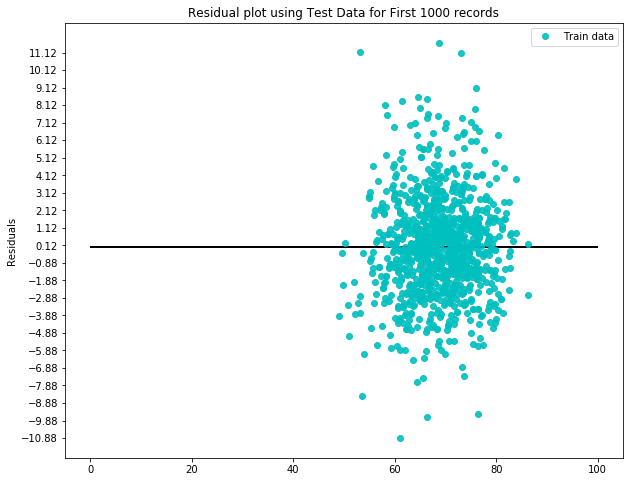

In [107]:
%matplotlib inline
plt.figure(figsize=(10,8))
plt.plot(pred_train[:1000],resudials_train,'o',c="c",alpha=0.9, label = 'Train data')
# plt.plot(pred_test[:1000],resudials,'^',c="b",alpha=.9,  label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')

# ax = plt.gca()
# ax.set_ylim([np.min(pred_test[:25]- Y_test[:25]),np.max(pred_test[:25]- Y_test[:25]))

plt.yticks(np.arange(resudials_train['overall_rating'].min(), resudials_train['overall_rating'].max()))

# Y label
plt.ylabel("Residuals")

## plot title
plt.title("Residual plot using Test Data for First 1000 records")

plt.show()

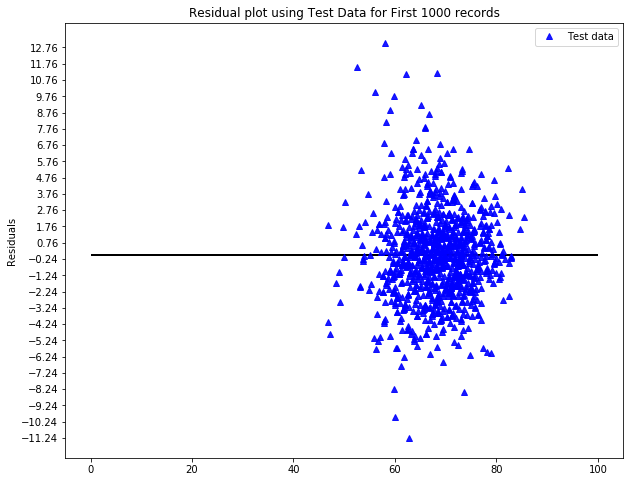

In [108]:
%matplotlib inline
plt.figure(figsize=(10,8))
#plt.scatter(pred_train,pred_train- Y_train,c="b",s=40,alpha=0.9, label = 'Train data')
plt.plot(pred_test[:1000],resudials_test,'^',c="b",alpha=.9,  label = 'Test data')

## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 100, linewidth = 2)
 
## plotting legend
plt.legend(loc = 'upper right')

# ax = plt.gca()
# ax.set_ylim([np.min(pred_test[:25]- Y_test[:25]),np.max(pred_test[:25]- Y_test[:25]))

plt.yticks(np.arange(resudials_test['overall_rating'].min(), resudials_test['overall_rating'].max()))

# Y label
plt.ylabel("Residuals")

## plot title
plt.title("Residual plot using Test Data for First 1000 records")

plt.show()

In [32]:
Y_pred[:10] #Get first 10 Predicted Value

array([[ 72.81450411],
       [ 73.29698795],
       [ 53.22295626],
       [ 69.90730866],
       [ 68.17420231],
       [ 65.98789109],
       [ 73.26300556],
       [ 72.2822516 ],
       [ 71.85757923],
       [ 73.39673745]])

In [33]:
Y_test[:10] #Get first 10 Actual Value

,overall_rating
25947,74.0
73218,68.0
153816,48.0
138422,68.0
128603,69.0
156822,61.0
127541,71.0
90943,72.0
717,70.0
165782,78.0


In [33]:
import pickle
filename = 'SoccerLinModel_Final.sav'

In [ ]:

# save the model to disk
pickle.dump(LIN_model, open(filename, 'wb'))

In [34]:
# Load the model from the disk and predict the values
SoccerLin_model = pickle.load(open(filename, 'rb'))
result = SoccerLin_model.score(X_train, Y_train)
print("Training Accuracy:", result *100, "%")
result = SoccerLin_model.score(X_test, Y_test)
print("Test Accuracy:", result *100, "%")


Training Accuracy: 84.2431918408 %
Test Accuracy: 84.1821217867 %


In [34]:
# LOG_model = LogisticRegression()
# LOG_model.fit(X_train, Y_train)

In [35]:
# LON = LogisticRegression()
# cv_results = cross_val_score(LON, X, Y, cv=5,scoring="r2")
# cv_results.mean()

In [35]:
# Use Logistic regression for predication...
LON = LogisticRegression()
cv_results = cross_val_score(LON, X, Y, cv=5,scoring="r2")
cv_results.mean()
# Results does not look good.

C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Abilash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of

0.63634961036904358